In [1]:
from regression_helper import * # Подгружаем функции для визуализации
import numpy as np              # Подгруджаем библиотеку NumPy

X, y = get_data()               # Загружаем данные в X и y

In [2]:
def loss_function(X, y, k):
    
    N = X.shape[0]                    # получаем размер вектора столбца
    # или N = len(X)
   
    # создаем массив ошибок для каждого примера
    loss_for_sample = (k*X - y)**2
    
    # берем среднее значение
    loss = np.sum(loss_for_sample) / N      
    
    # или если переписать проще 
    # loss = np.mean((k*X - y)**2)
    return loss

In [3]:
def f(X, k):
    # Используем возможность ndarray и умножим массив X на скаляр k
    # Результат этой операции это ndarray
    return k*X

## Градиентный спуск

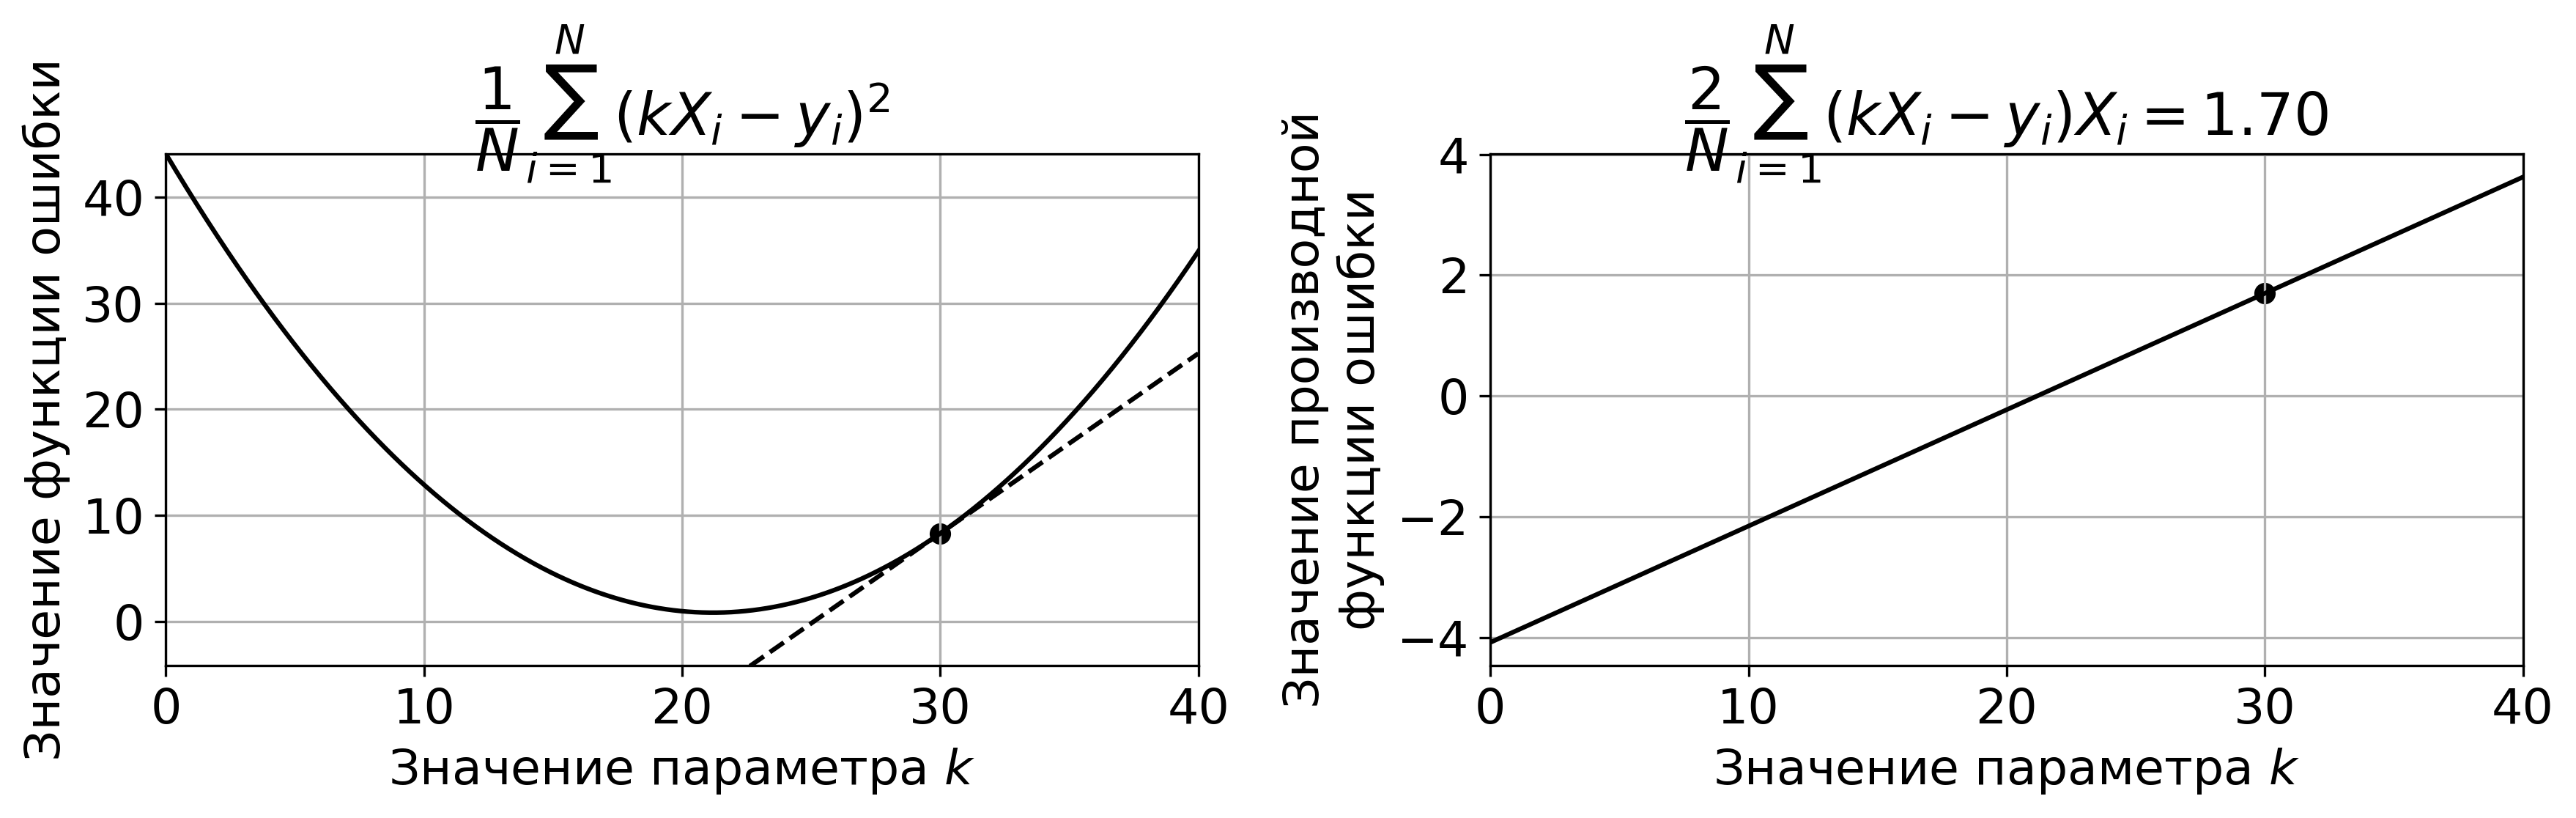

In [4]:
loss_function_and_with_derivation(X, y, k0=30)

Если производная **положительная** в точке $k_0$, и мы возьмем значение немного *больше*, то мы увидим, что значение функции в новой точке *возросло*. А если взять значение *меньшее* $k_0$, то значение функции будет *меньше* чем в точке $k_0$.

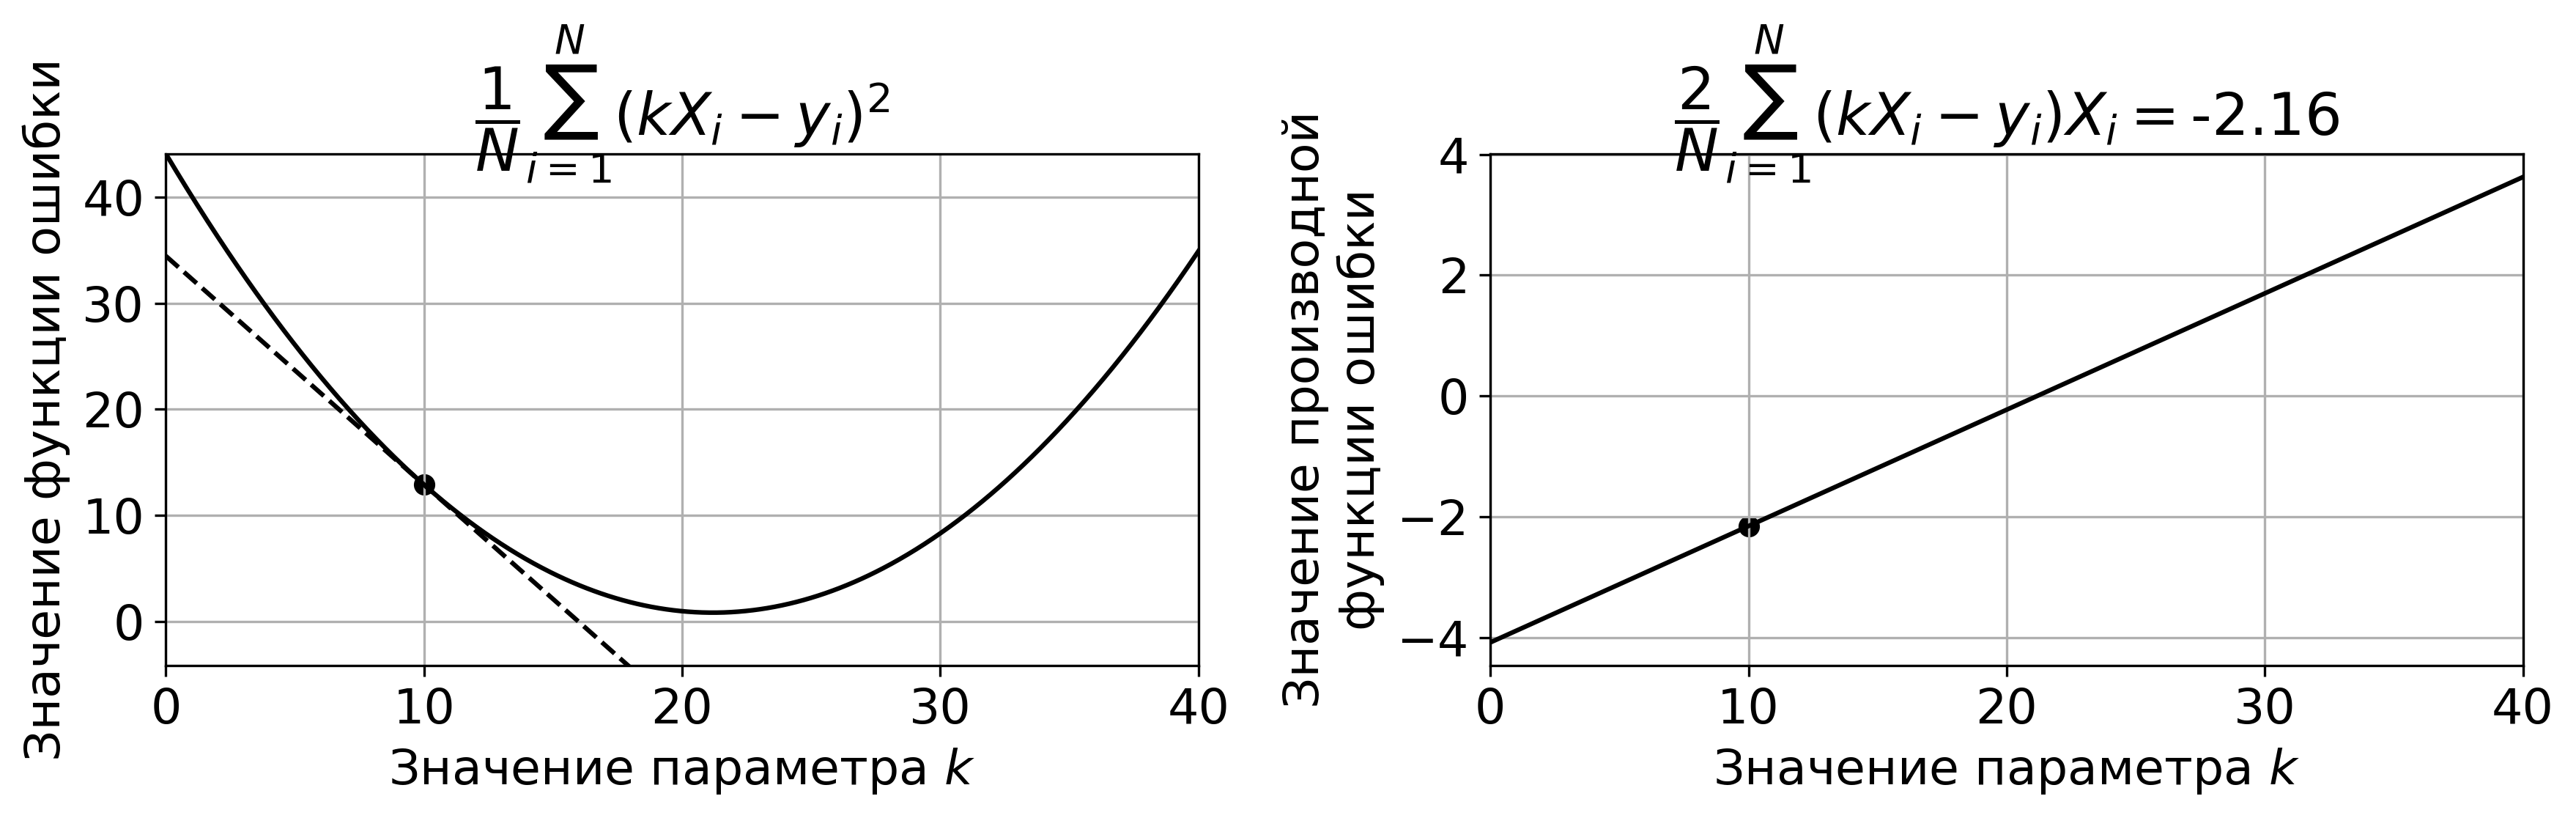

In [5]:
loss_function_and_with_derivation(X, y, k0=10)

Наоборот с отрицательным значением производной. Если производная **отрицательна** в точке $k_0$, и мы возьмем значение *больше* чем $k_0$, то мы увидим, что значение функции *уменьшилось*. А если взять значение *меньшее* $k_0$, то значение функции будет *больше* чем в точке $k_0$.

## Как менять занчение $k$

Хотелось бы менять его на большое значение, когда $k$ мы далеко от минимума функции, что бы быстрее добраться до минимума. 

И нужно менять $k$ на малое значение, когда мы близко к минимуму, что не пропустить минимум.

То есть, когда мы далеко от минимума, нужно менять $k$ на большое значение. А когда близко к минимуму, то на малое значение.

Рассмотрим значения производных в разных точках.

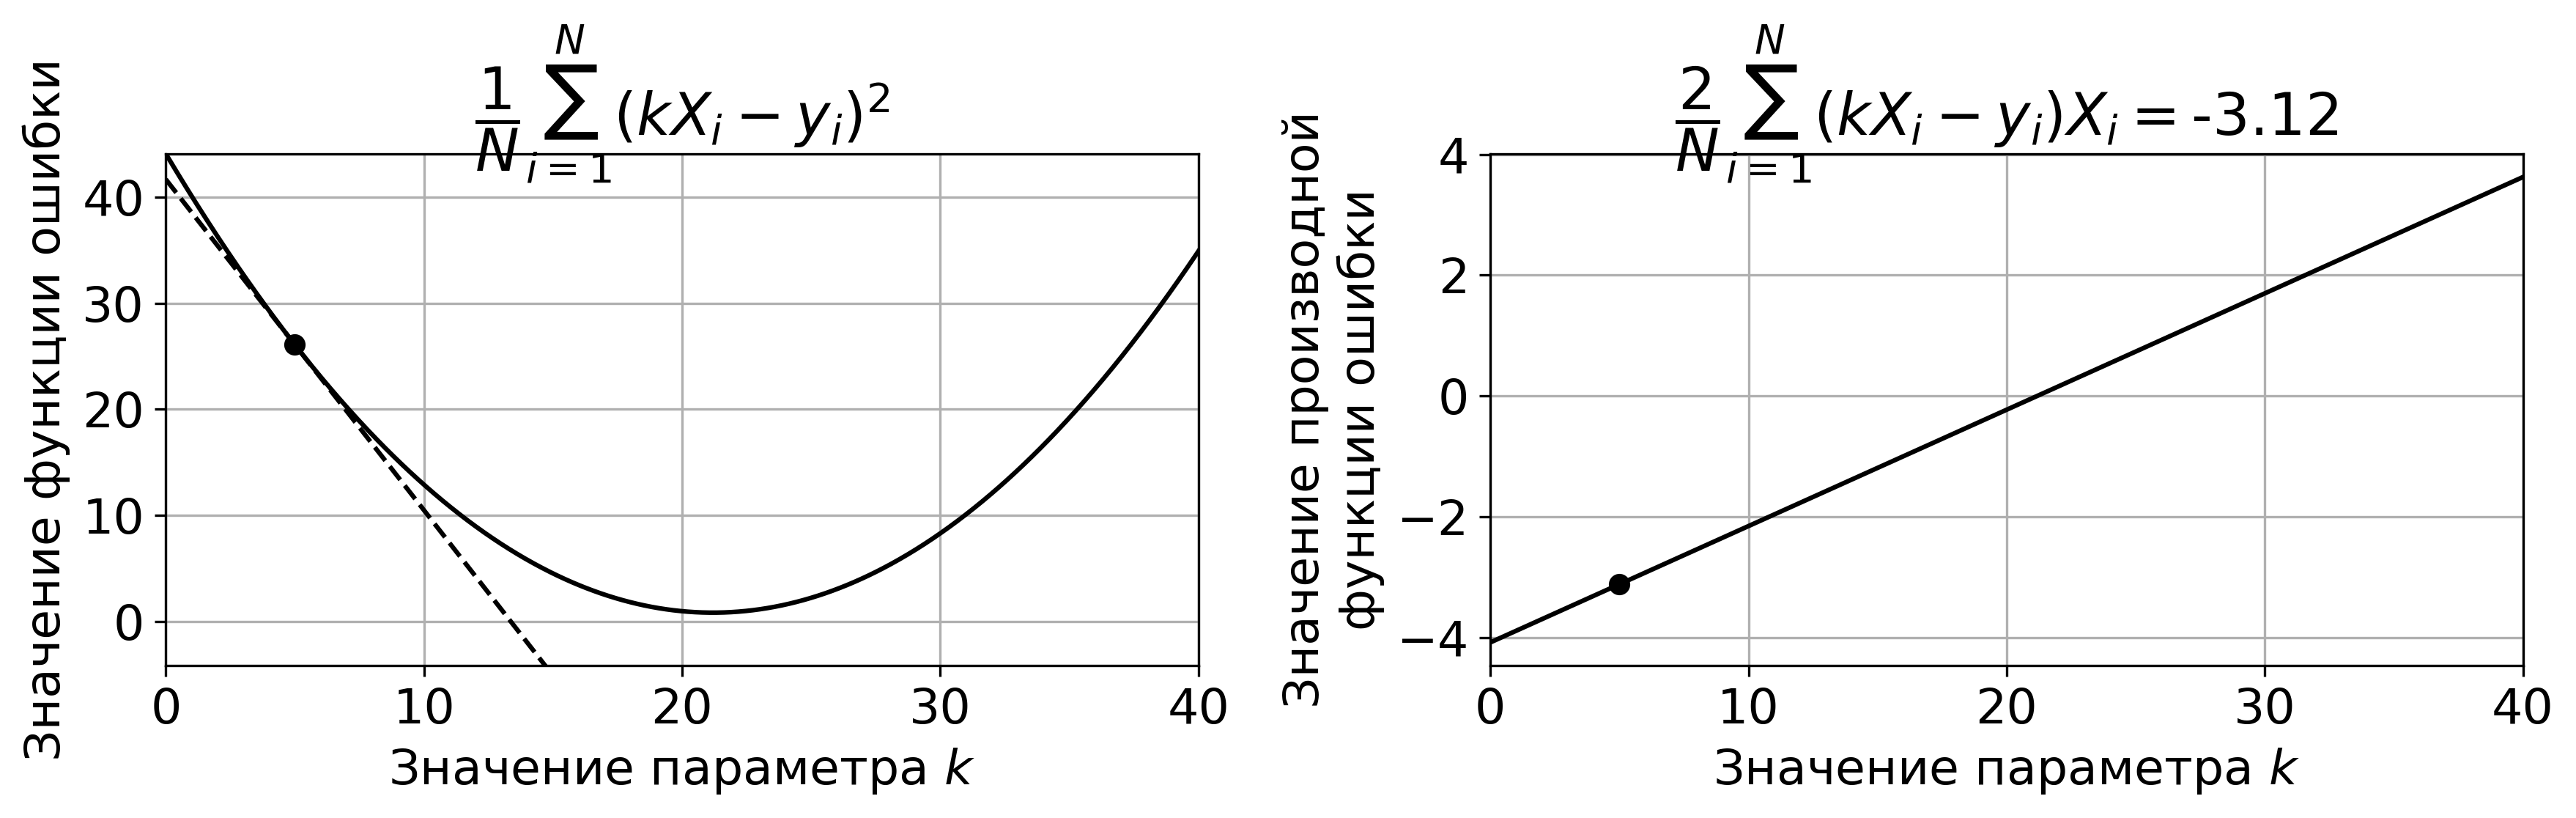

In [6]:
loss_function_and_with_derivation(X, y, k0=5)

Производная в точке $k_0=5$ равна $-3.12$.

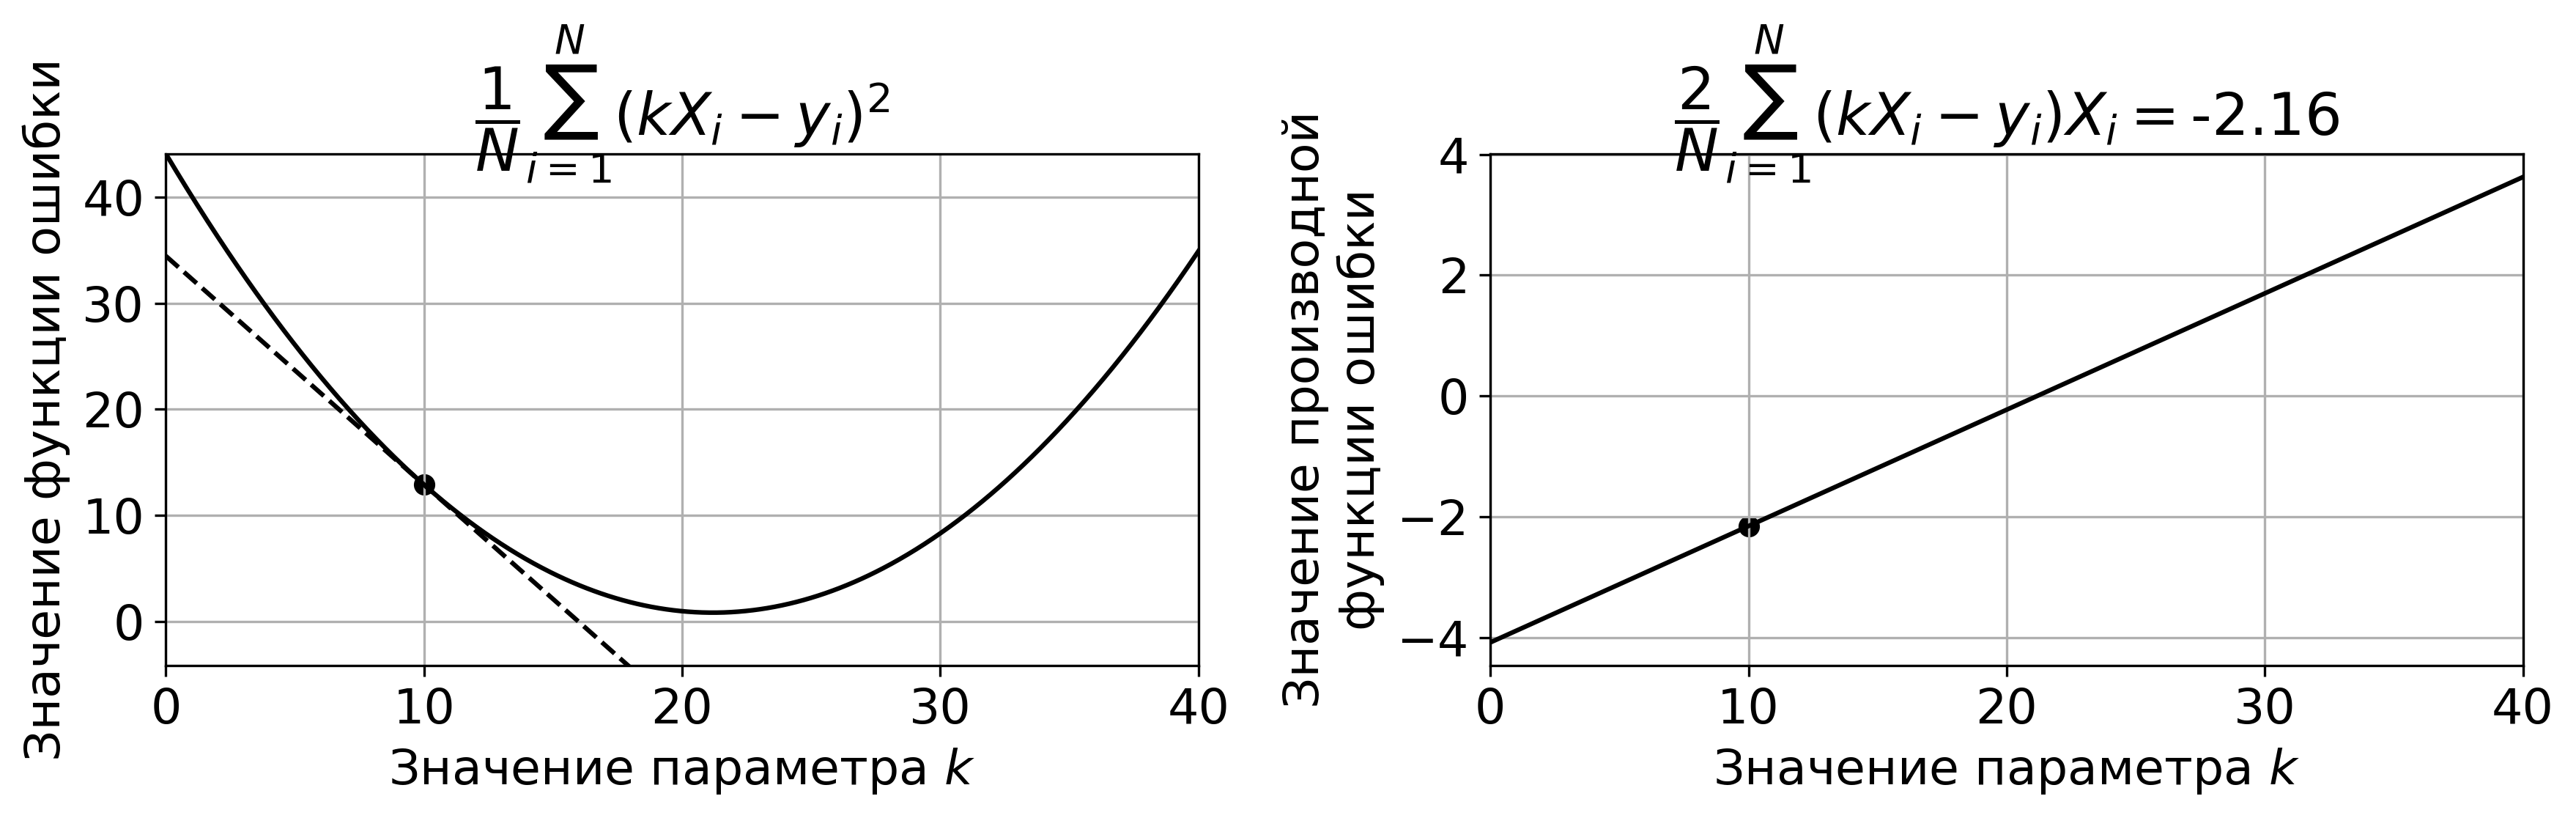

In [7]:
loss_function_and_with_derivation(X, y, k0=10)

Производная в точке $k_0=10$ равна $-2.16$.

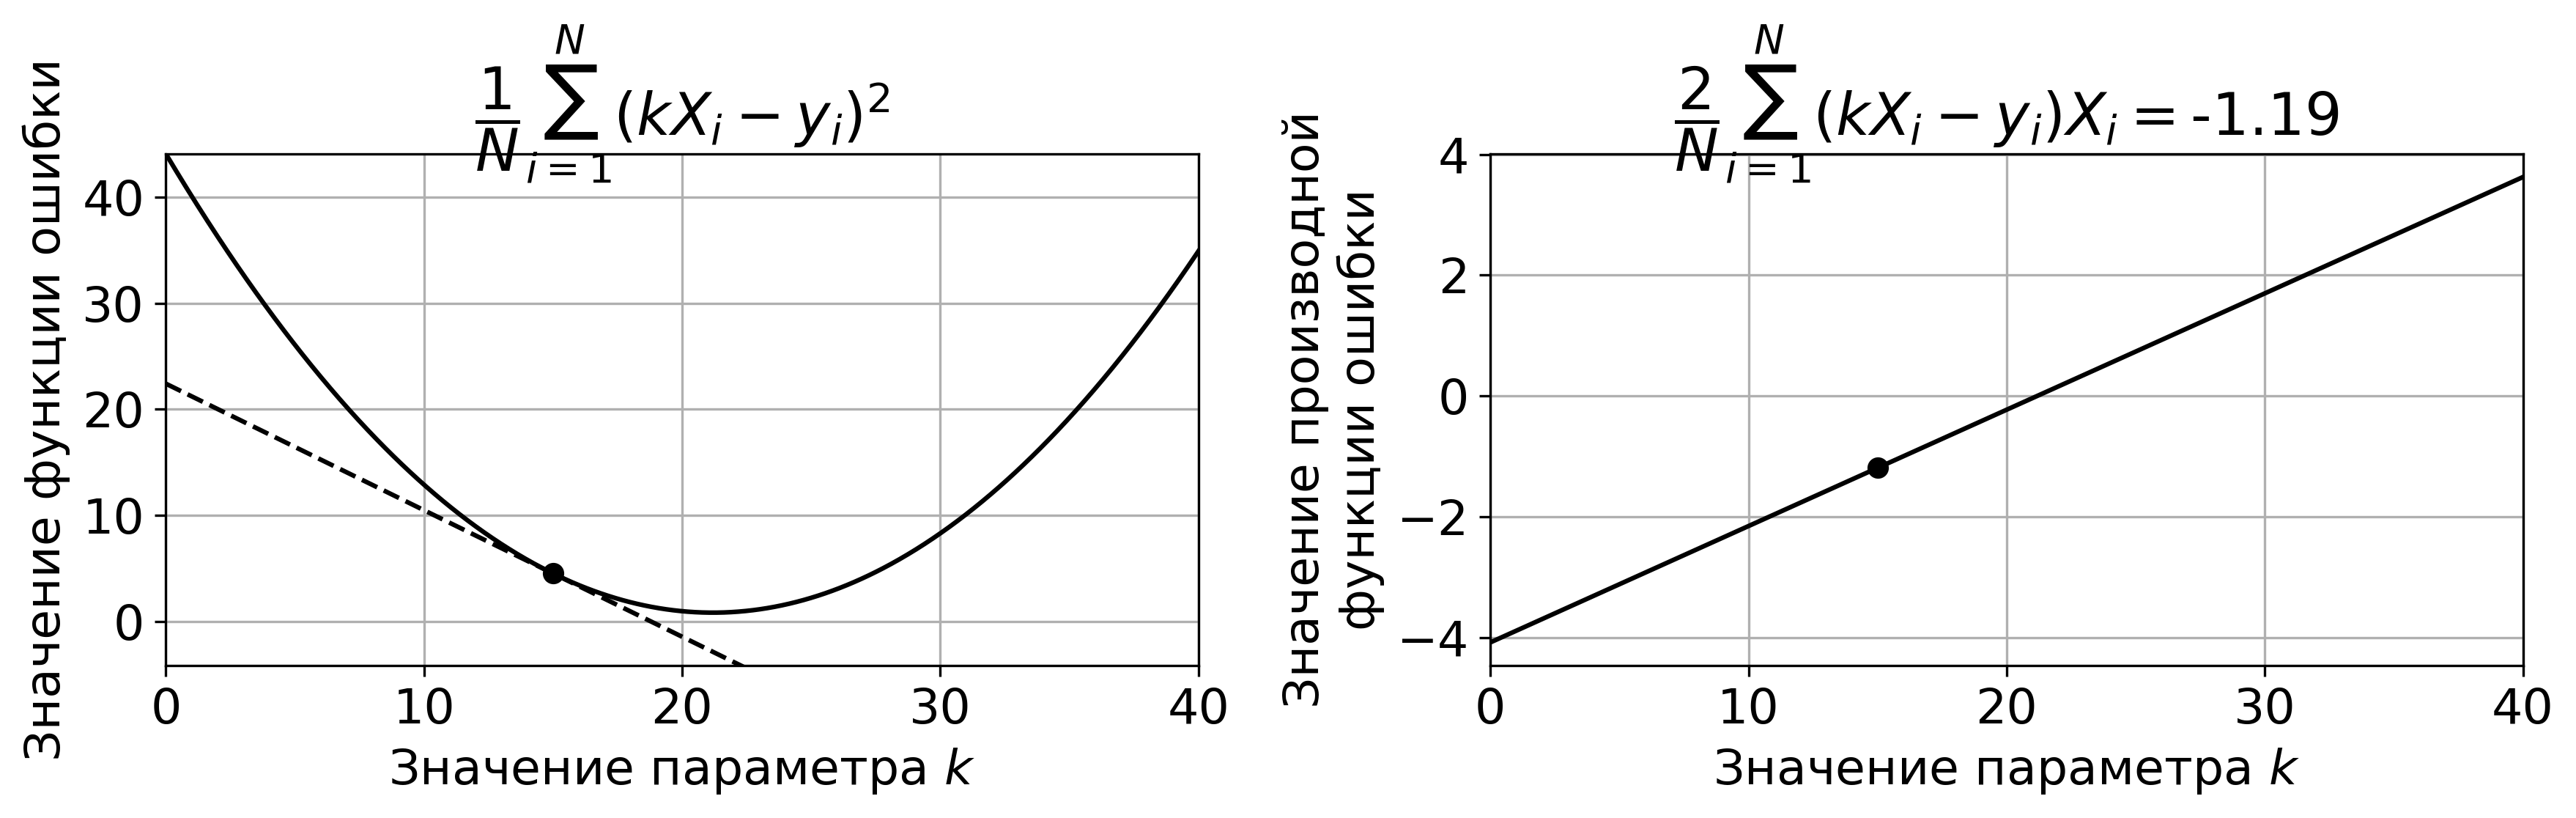

In [8]:
loss_function_and_with_derivation(X, y, k0=15)

Производная в точке $k_0=15$ равна $-1.19$.

Минимум находится около точки $k_0 = 20$.

| Точка $k_0$ | Значание производной
| -----  | --- |
|  5   |  -3.12  |
|  10   |  -2.16  |
|  15  |  -1.19  |


Чем дальше текущее значение от минимума слева, тем меньше значение производной.

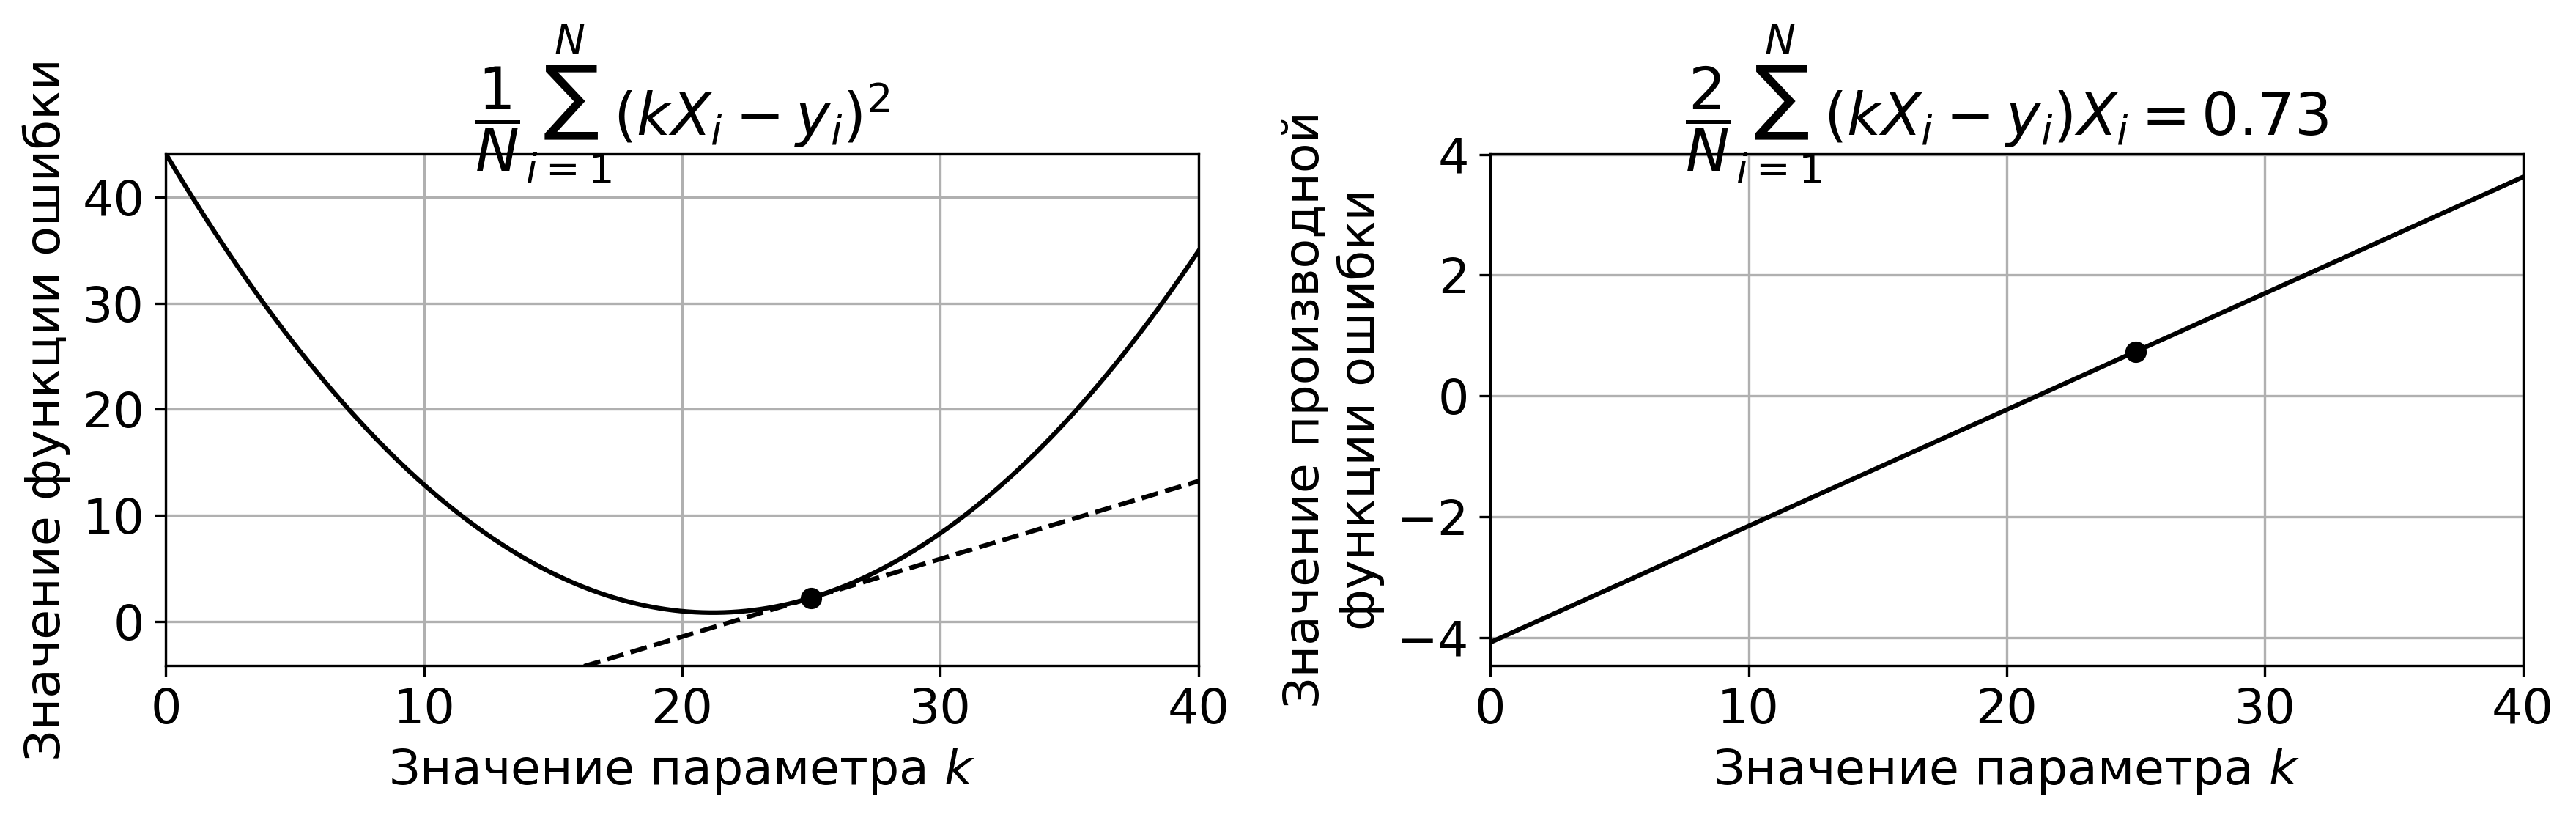

In [9]:
loss_function_and_with_derivation(X, y, k0=25)

Производная в точке $k_0=25$ равна $0.73$.

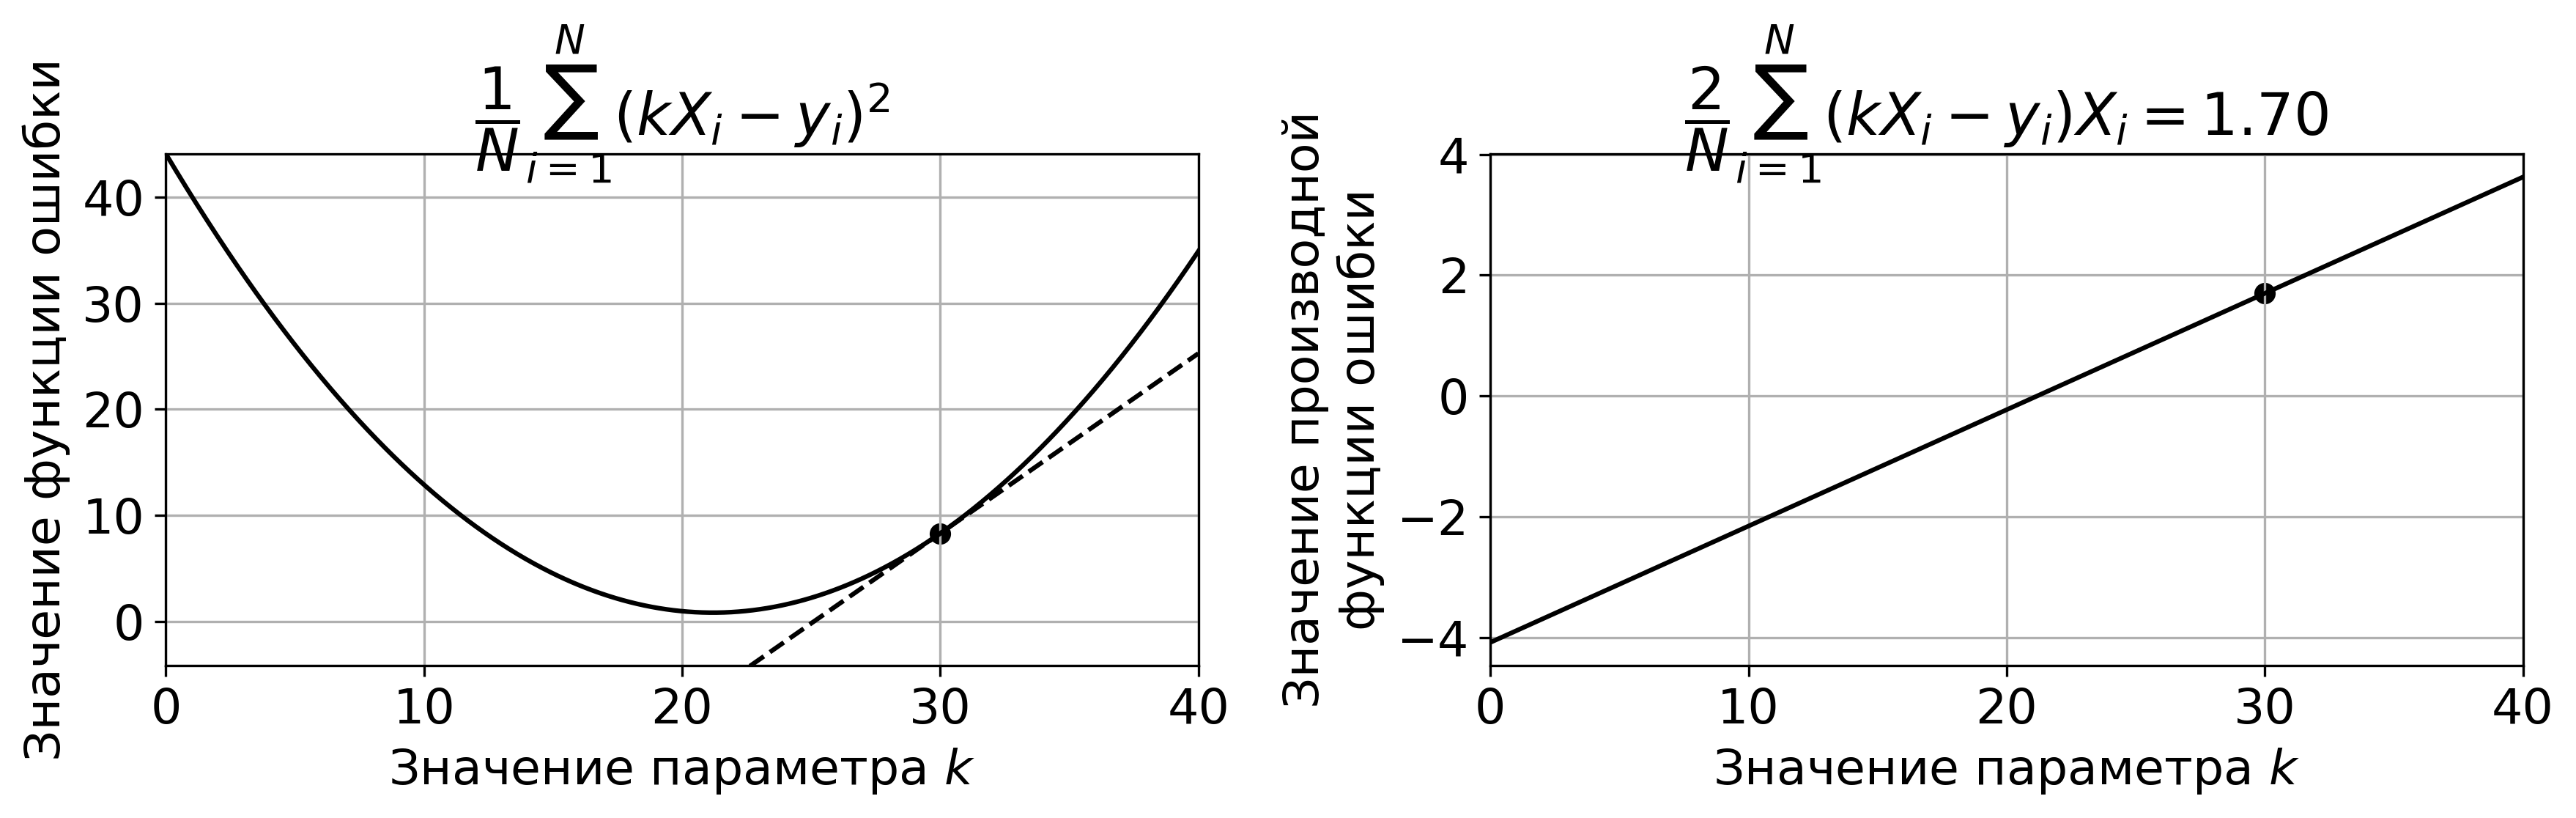

In [10]:
loss_function_and_with_derivation(X, y, k0=30)

Производная в точке $k_0=30$ равна $1.70$.

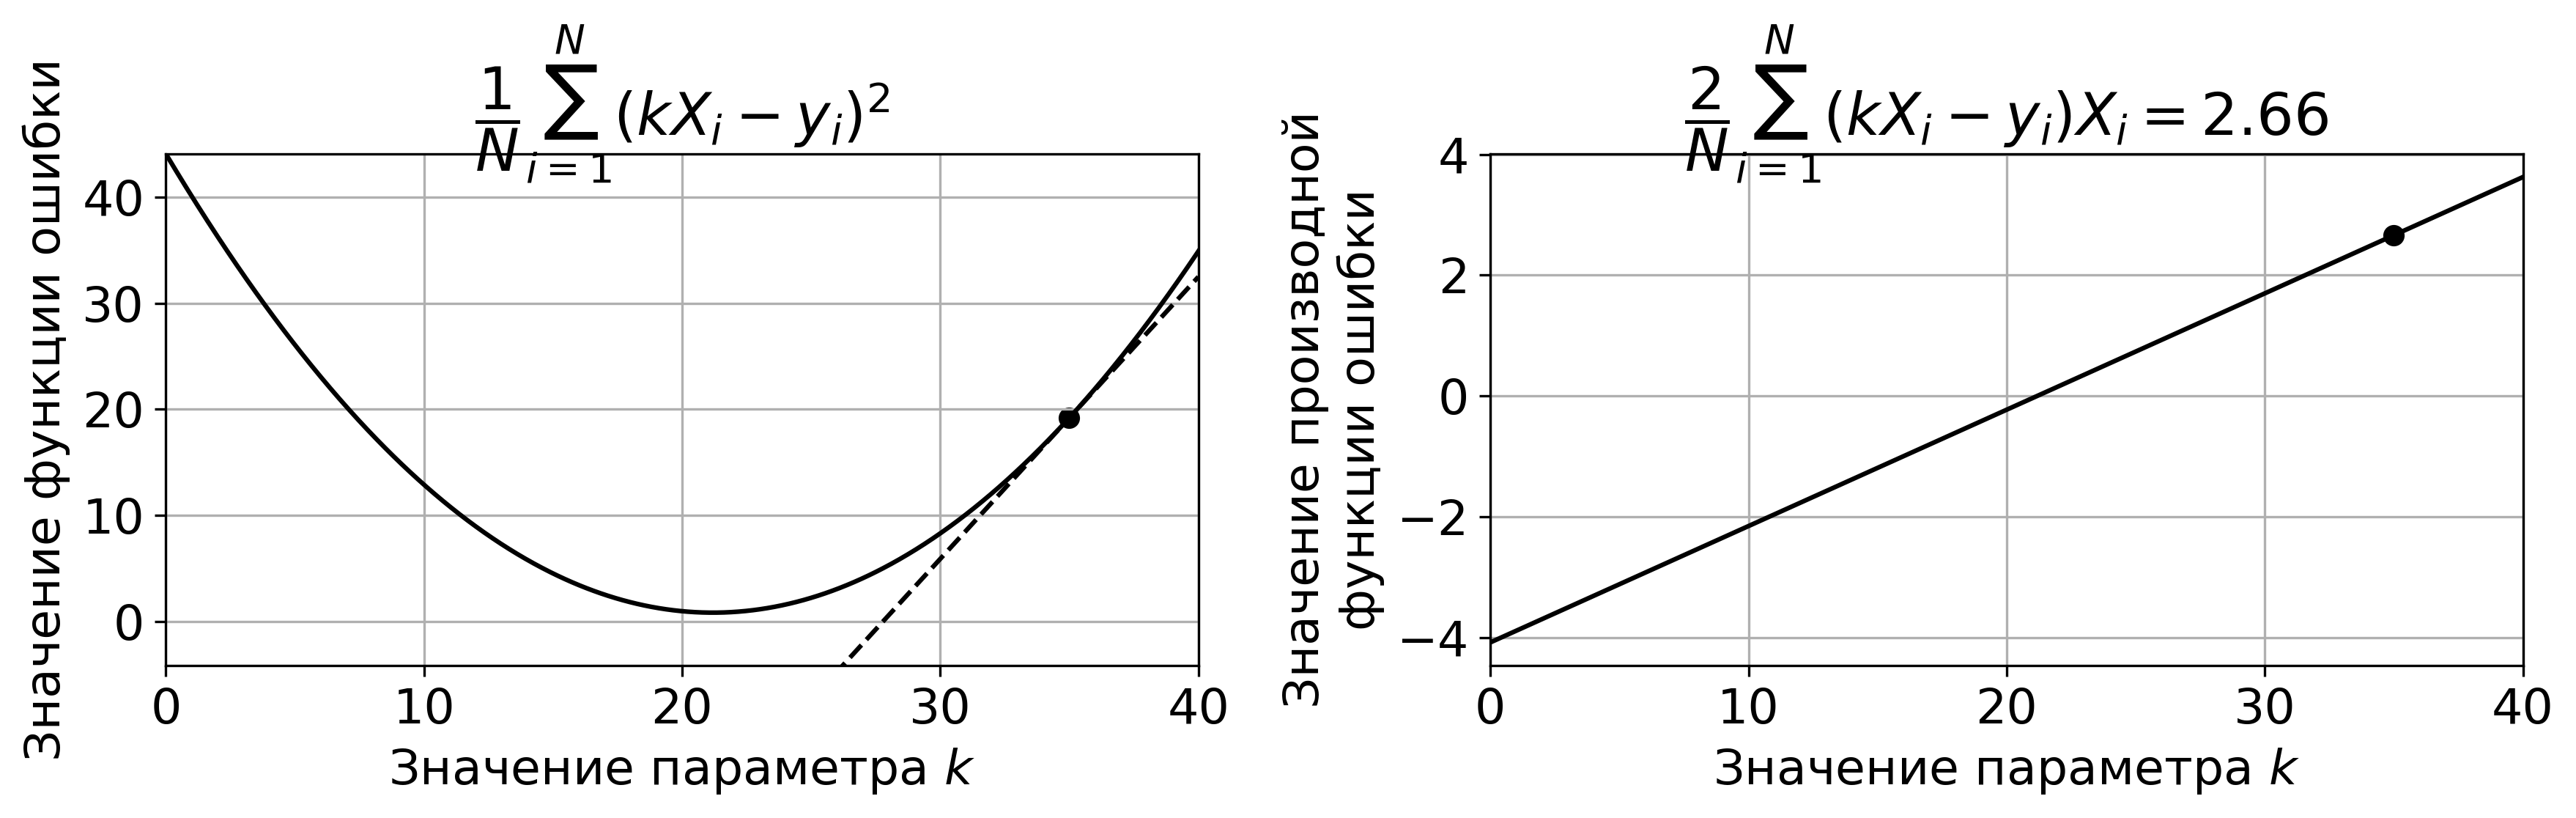

In [11]:
loss_function_and_with_derivation(X, y, k0=35)

Производная в точке $k_0=35$ равна $2.66$.

Минимум находится около точки $k_0 = 20$.

| Точка $k_0$ | Значание производной
| -----  | --- |
|  25   | 0.73  |
|  30   |  1.70  |
|  35   |  2.66  |

Чем дальше текущее значение от минимума слева, тем меньше значение производной. 

Чем дальше текущее значение от минимума справа, тем больше значение производной.

Рядом с минимумом производная принимает маленькое значение по модулю.

В качестве значания, на которое нужно менять текущую точку можно использовать отрицательное значение производной. 

# Градиентный спуск

* Выбираем случайное значение для $k$

* Повторяем $iter$ раз:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{new} = k - \alpha \cdot \dfrac{d  Loss(k)}{dk}$,

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k = k_{new}$,

где $\alpha$ это коэффициент, который мы выбреем. Он называется коэффициент скорости обучения (learning rate).

# Реализация градинетного спуска

## Реализация подсчета производной

Для входных данных массива $X$, реального выходного значения $y$ и параметра $k$ необходимо реализовать подсчет производной. 

На входе:

* Массив входных значений $X$;

* Массив реальных выходных значений $y$;

* Коэффициент $k$ функции $f(X)=kX$;


На выходе:

* На выходе значение производной функции ошибки $Loss'(k)$

Формула производной функции ошибки:

$Loss'(k) = \dfrac{2}{N} \sum_{i=0}^{N}{(kX_i - y_i)X_i} $

In [12]:
def derivative_function(X, y, k):
    # С помощью f(X, k) мы находим массив предсказанных значений и вычитаем из него массив реальных выходных значений
    # Эту разность мы поэлементно умножаем на массив Х
    # С помощью функции np.mean мы получаем среднее значение массива.
    # np.mean(X) эквивалентной np.sum(X)/len(X)
    
    derivative = 2*np.mean((f(X, k) - y) * X)
    return derivative   

k = 1
print(derivative_function(X, y, k))

-3.89093


## Реализация градиентного спуска

Для входных данных массива $X$, реального выходного значения $y$, начального значения $k_{init}$, значения параметра $\alpha$ необходимо реализовать градиентный спуск. 

На входе:

* Массив входных значений $X$;

* Массив реальных выходных значений $y$;

* Начальный коэффициент функции $k_{init}$;

* Коэффициент обучения $\alpha$;

* Количество итераций алгоритма $iter$;

На выходе:

* На выходе значение коэффициента $k$

Алгоритм градиентного спуска:

* Повторяем $iter$ раз:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{new} = k - \alpha \cdot \dfrac{d  Loss(k)}{dk}$,

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k = k_{new}$. 

In [13]:
def gradient_descent(X, y, k_init, alpha, iters):
    
    # инициализируем начальное значение
    k = k_init
    
    # выполняем iters раз
    for i in range(0, iters):
        # считаем производную, умножаем ее на коэффициент обучение
        # меняем коэффициент на значение производной умноженной на альфу
        k = k - (alpha * derivative_function(X, y, k))
        
        # Можно заменить на 
        # k -= alpha * derivative_function(X, y, k)
    # возвращаем посчитанное значение
    return k

k_init = 1.0
alpha = 1
iters = 100
k_gd = gradient_descent(X, y, k_init, alpha, iters)

print(f"Значение после градиентного спуска k={k_gd}")

Значение после градиентного спуска k=21.19269291624745


In [14]:
k_a = analytical_solution(X, y)
print(f"Аналитически решенное c помощью МНК k={k_a}")

Аналитически решенное c помощью МНК k=21.192693


In [15]:
print(f"Значение функции ошибки после обучения {loss_function(X, y, k_gd)}")

Значение функции ошибки после обучения 0.812787655820229


In [16]:
print(f"Значение функции ошибки для МНК {loss_function(X, y, k_a)}")

Значение функции ошибки для МНК 0.8127876558202299


In [17]:
print(f"Разница значений функций ошибок {loss_function(X, y, k_a) - loss_function(X, y, k_gd)}")

Разница значений функций ошибок 8.881784197001252e-16


## Визуализация результата

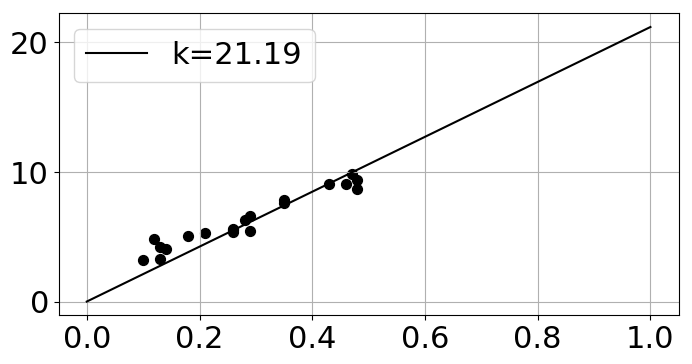

In [18]:
plot_data_and_hyp(X, y, k_gd)

## Разные параметры градиентного спуска

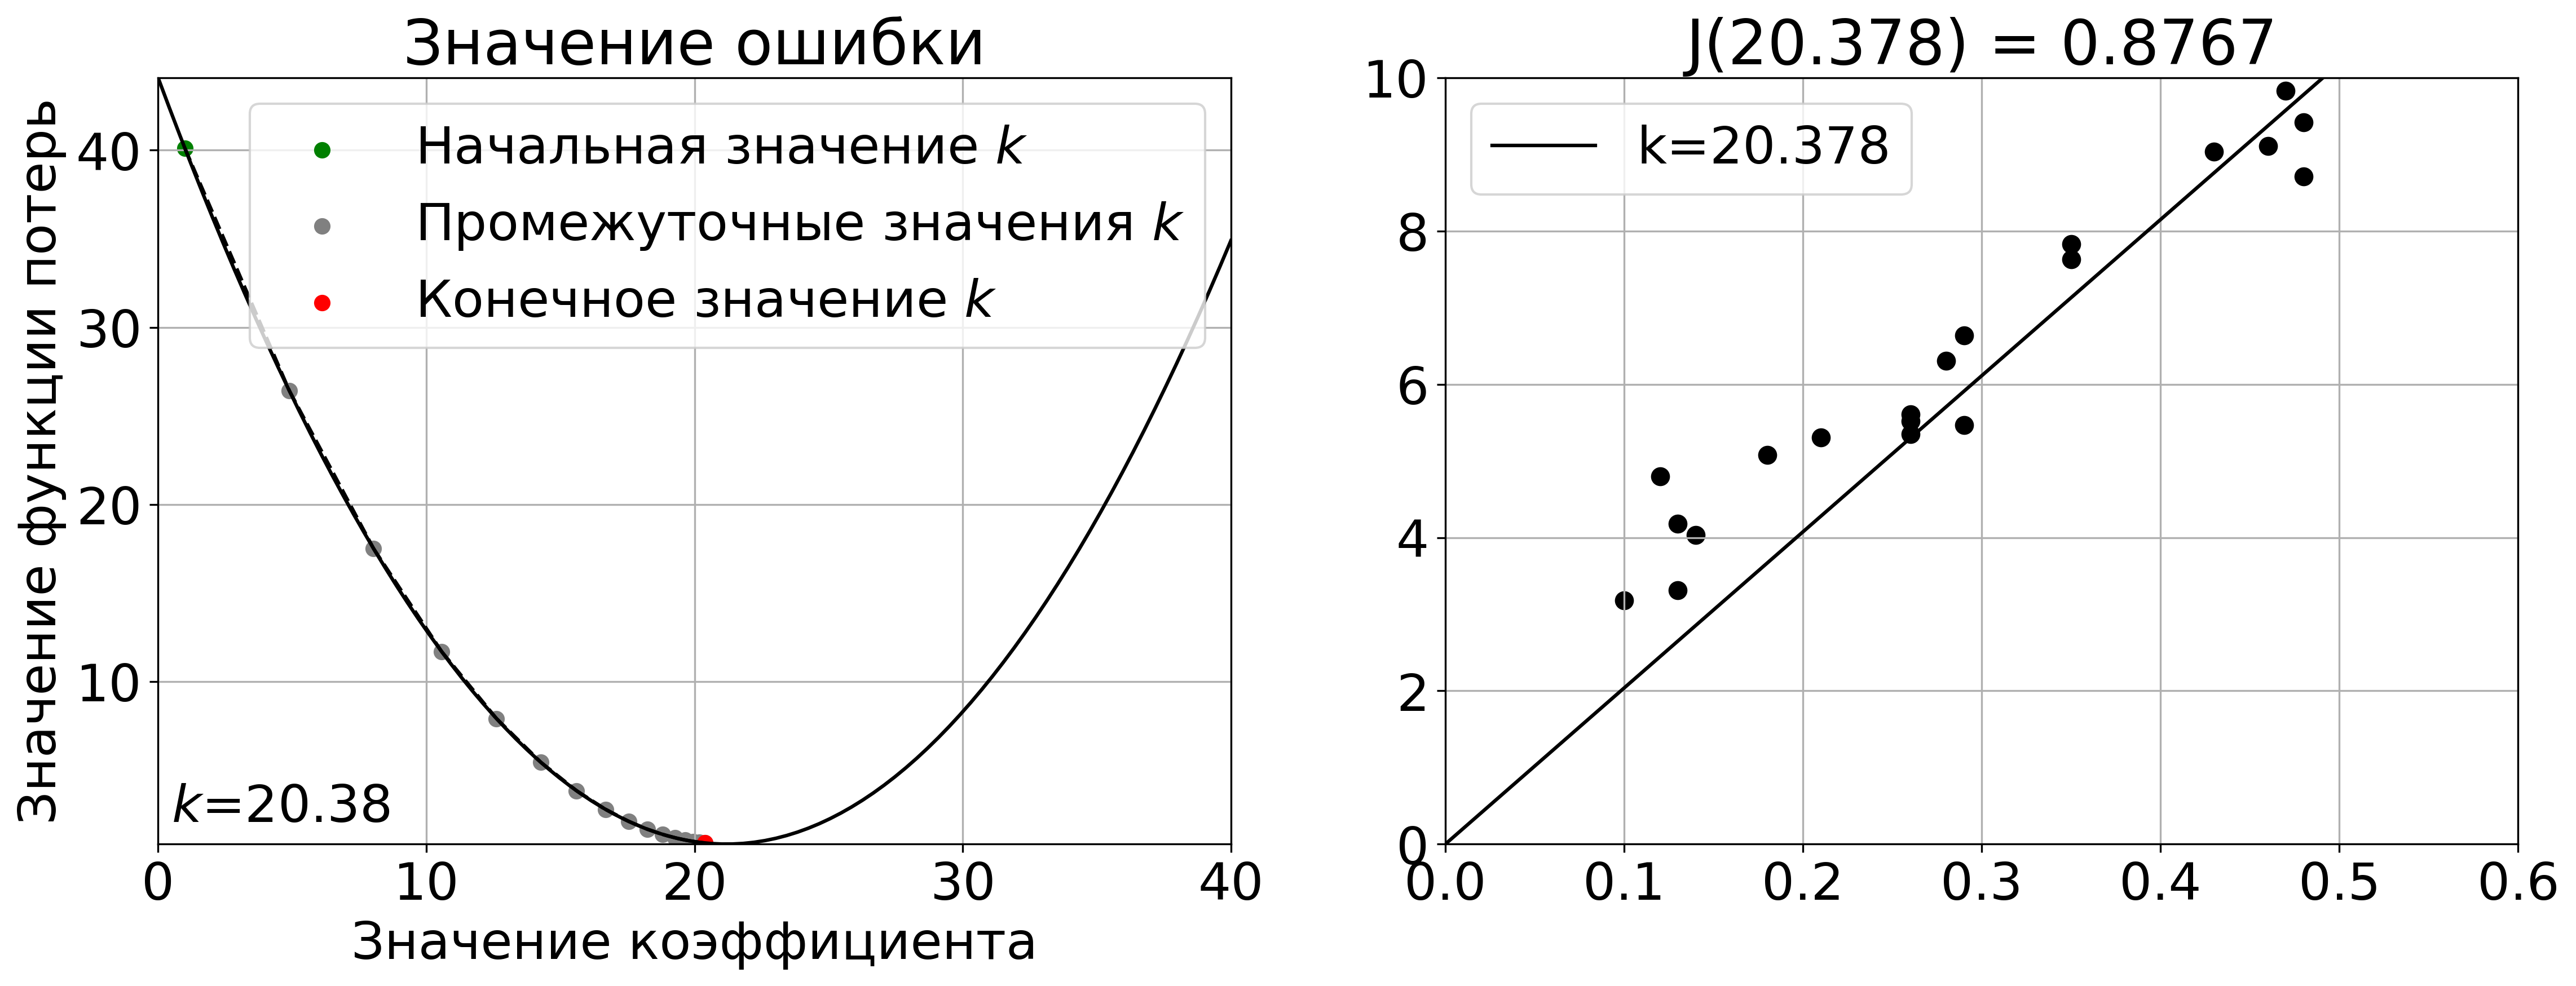

In [19]:
gradient_descent_visualization(X, y, k_init=1.0, a=1.0, it=15)

Хорошо подобранные параметры.

- Коэффициент скорости обучения: $1.0$
- Итераций: $15$

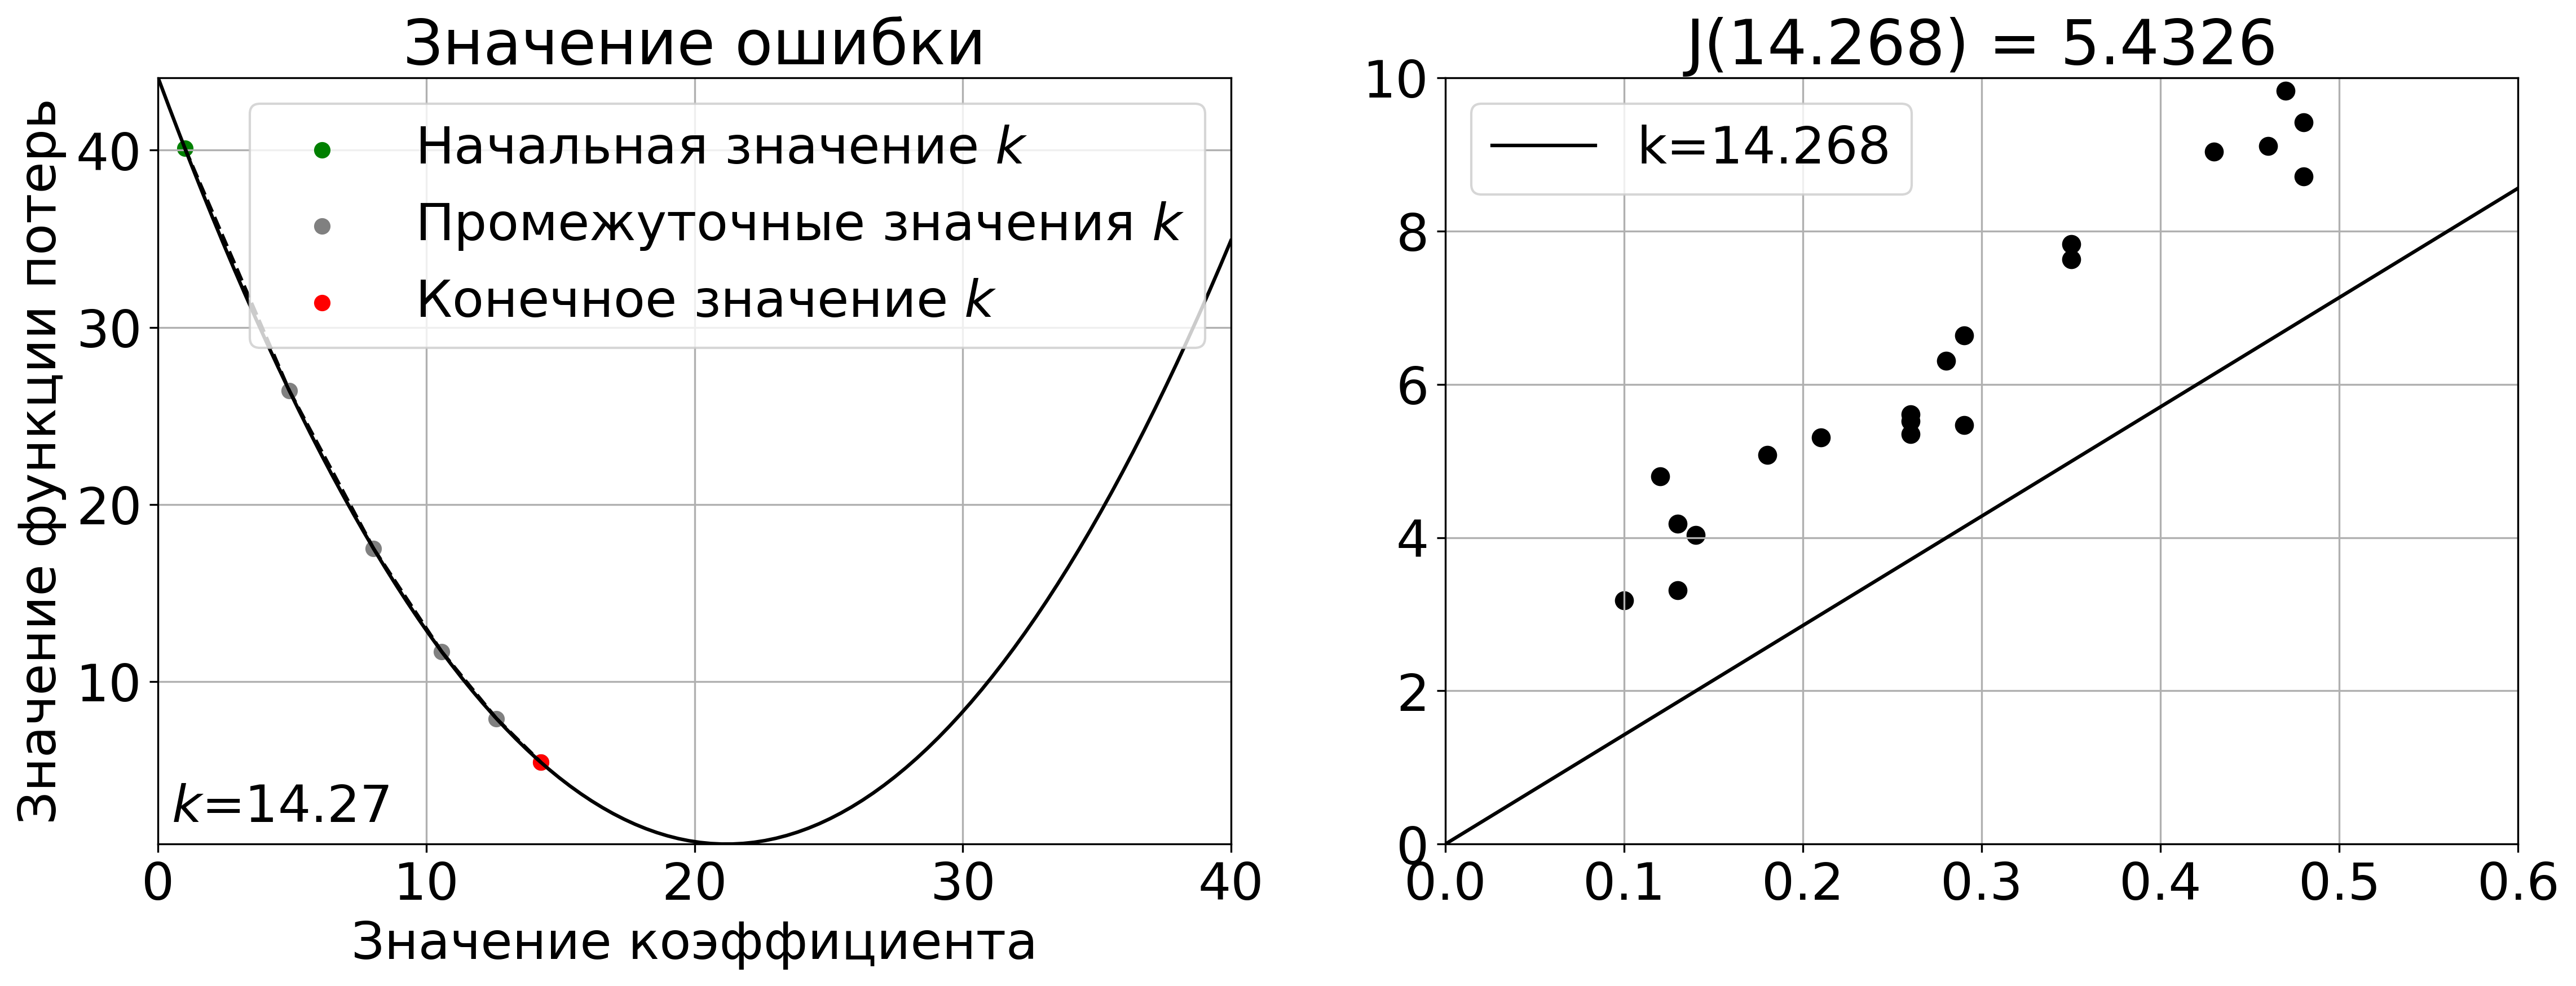

In [20]:
gradient_descent_visualization(X, y, k_init=1.0, a=1.0, it=5)

Недостаточно итераций.

- Коэффициент скорости обучения: $1.0$
- Итераций: $5$

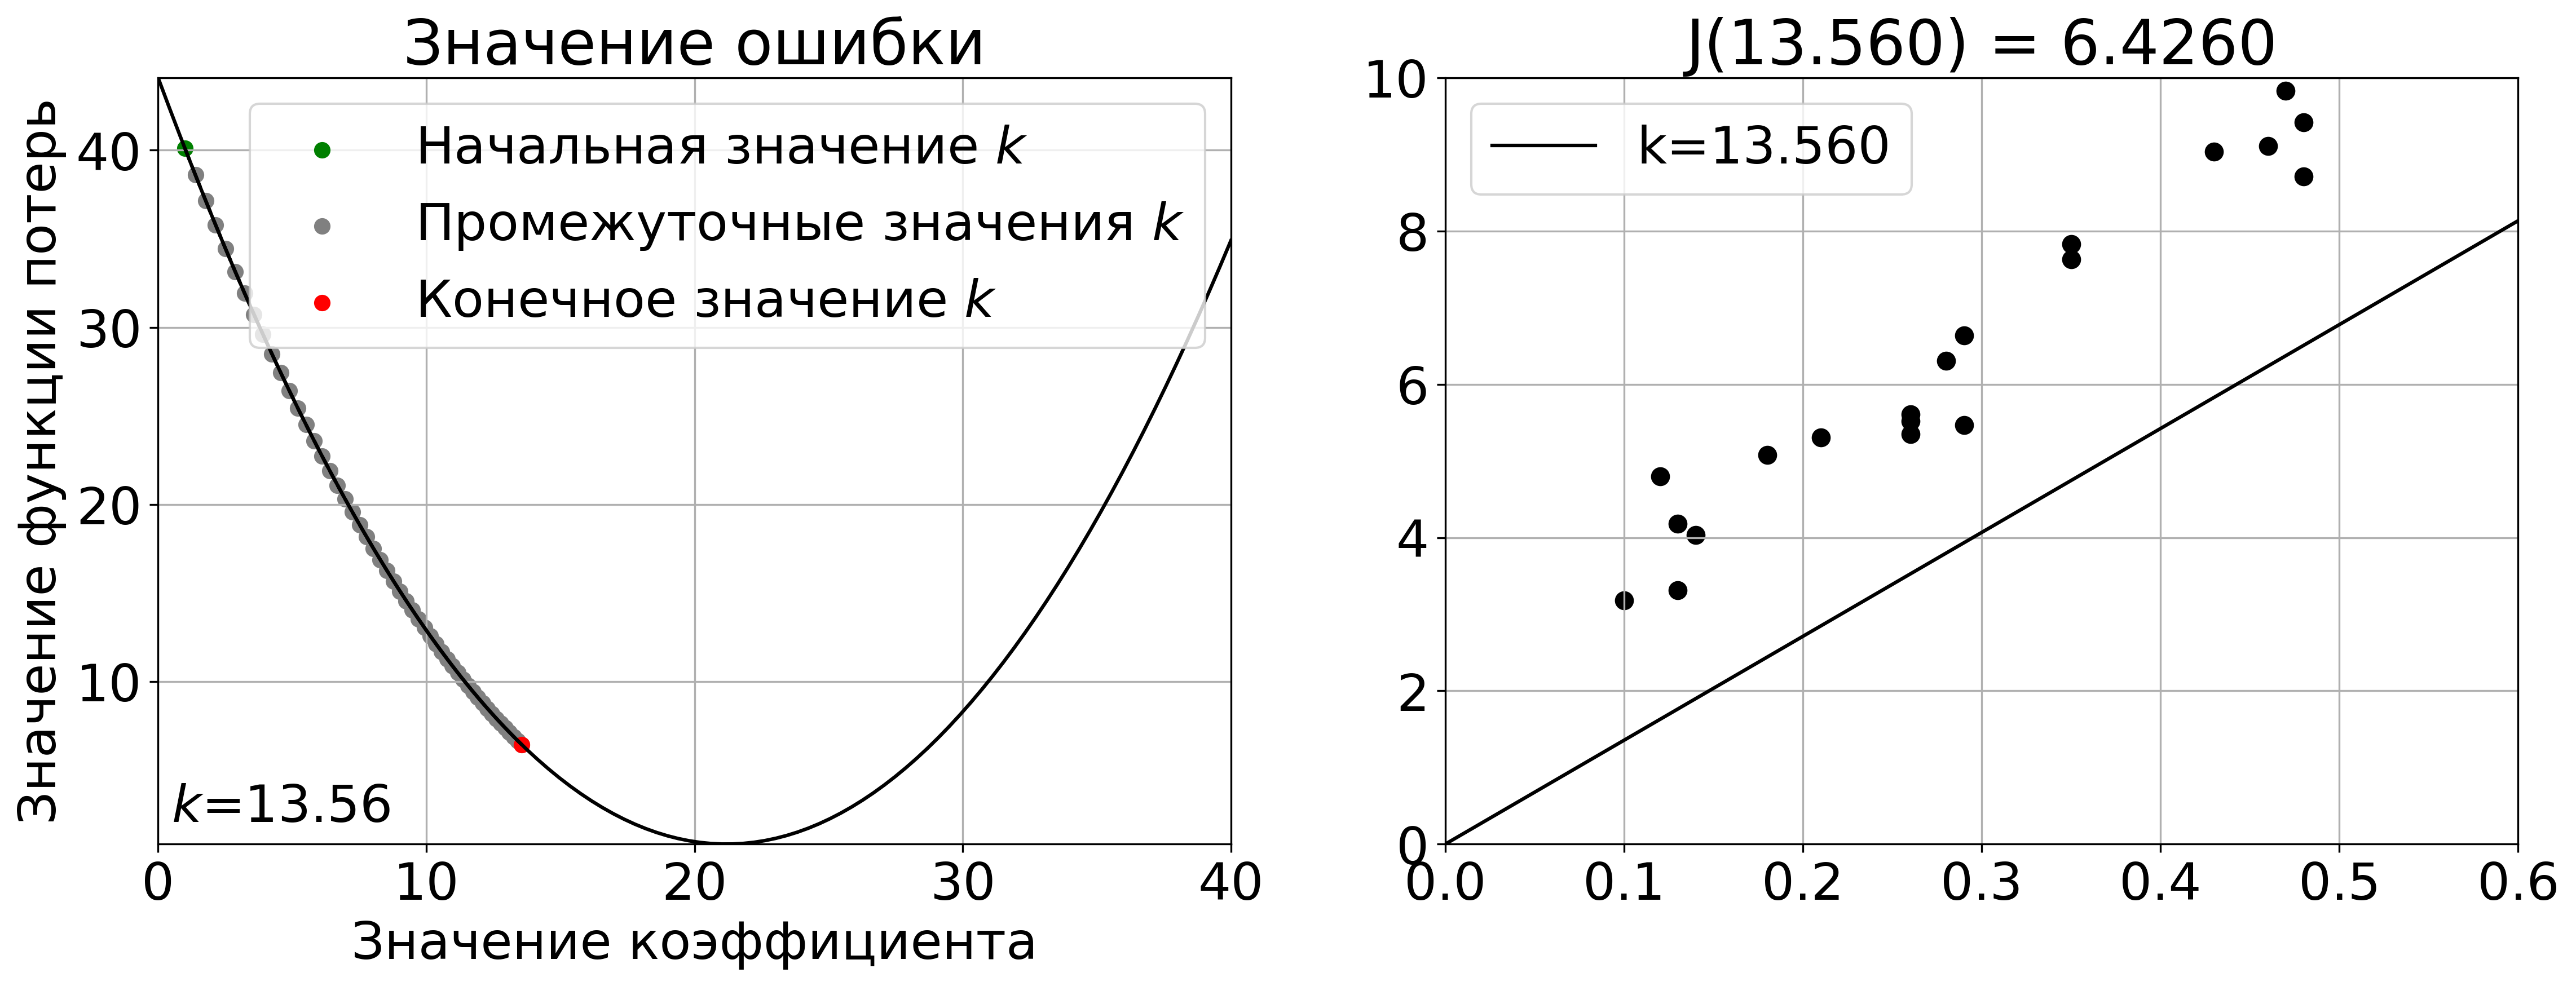

In [21]:
gradient_descent_visualization(X, y, k_init=1.0, a=0.1, it=50)

Слишком маленький коэффициент скорости обучения

- Коэффициент скорости обучения: $0.1$
- Итераций: $50$

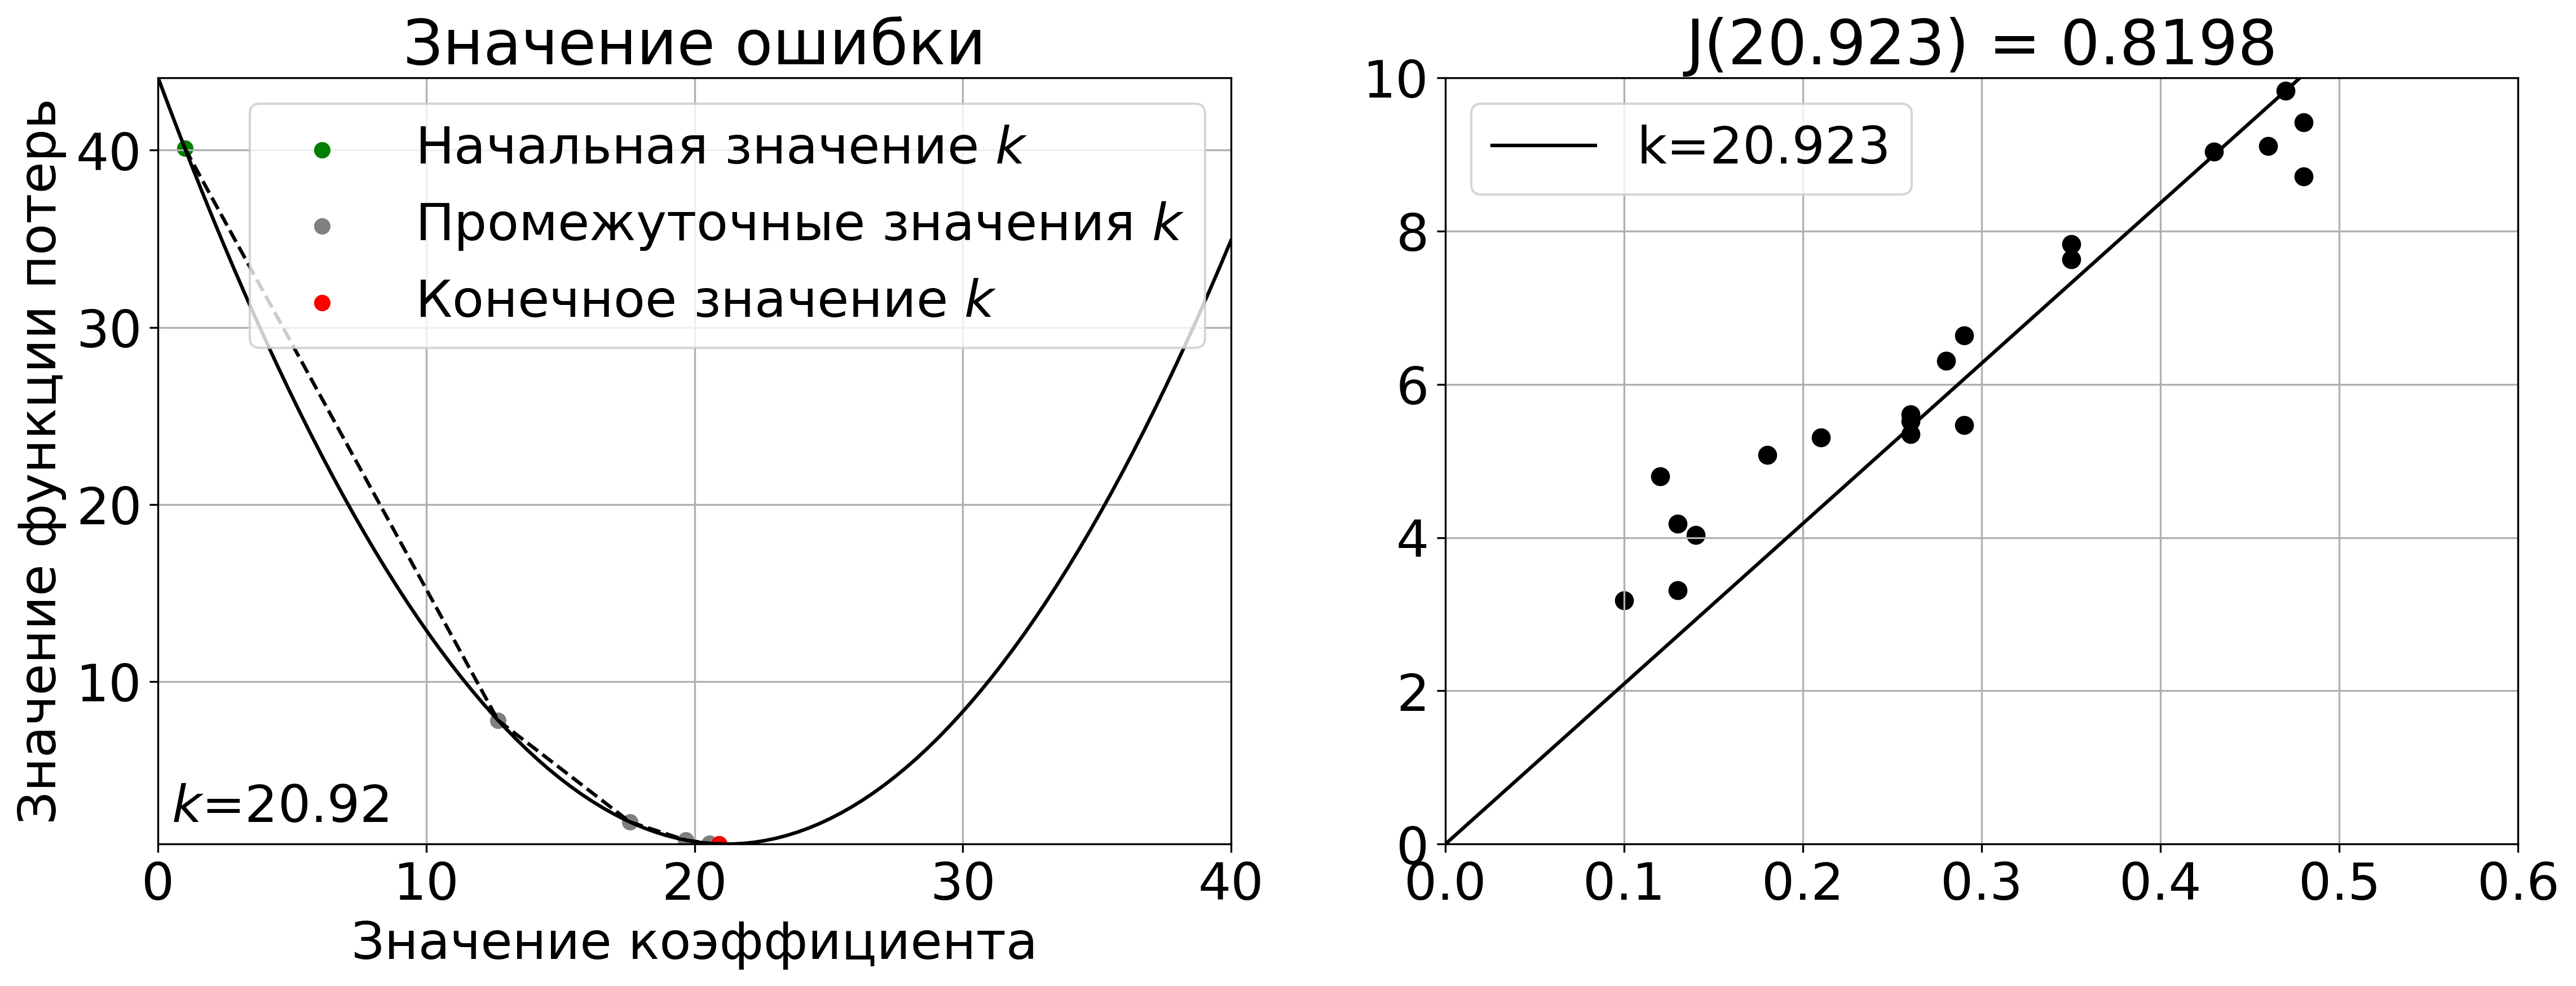

In [22]:
gradient_descent_visualization(X, y, k_init=1.0, a=3.0, it=5)

Хорошо подобранные параметры.

- Коэффициент скорости обучения: $3.0$
- Итераций: $5$

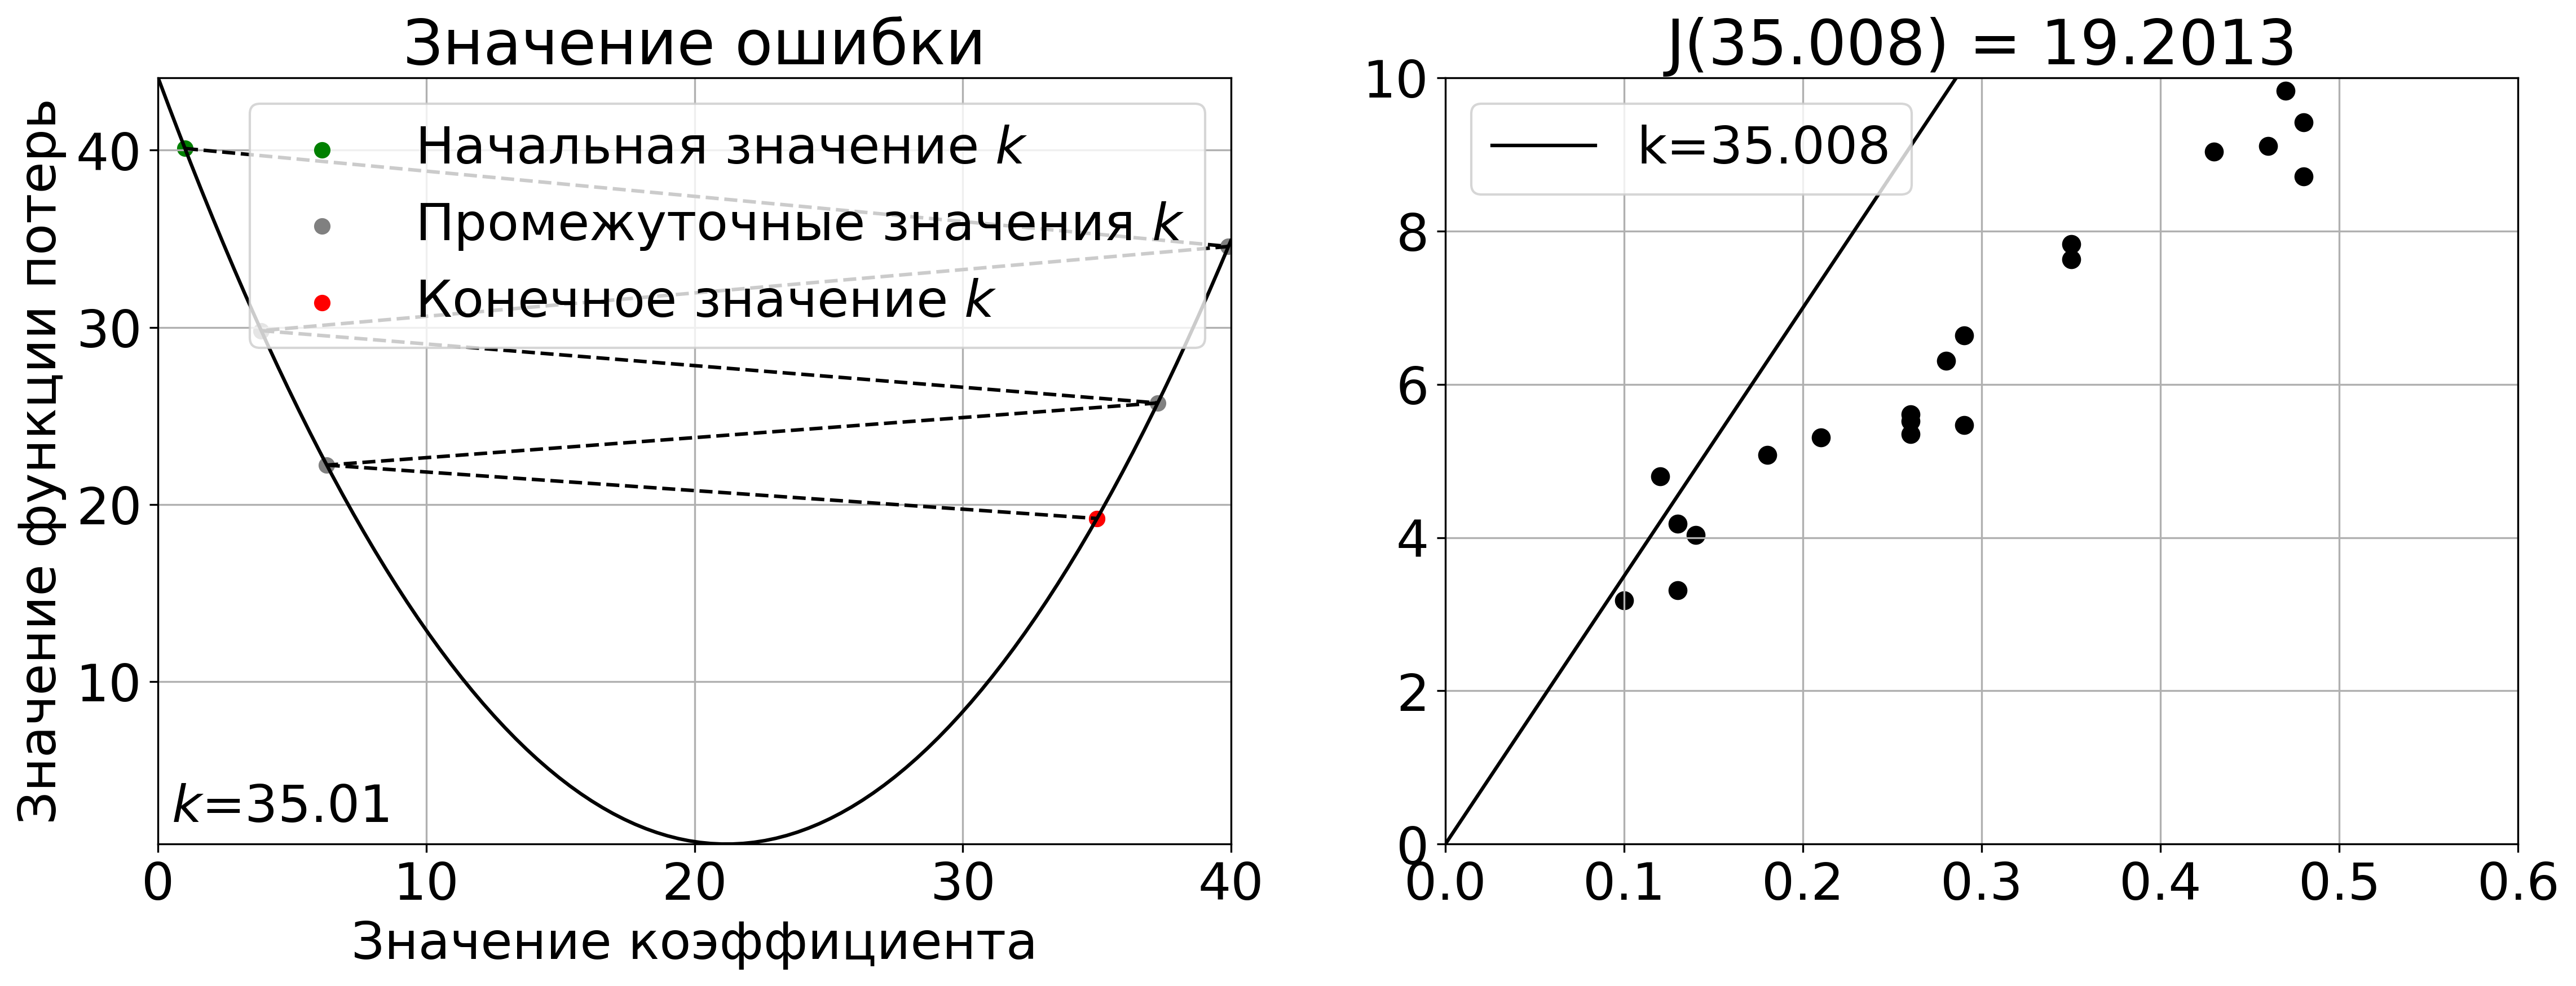

In [23]:
gradient_descent_visualization(X, y, k_init=1.0, a=10.0, it=5)

Слишком большой learning rate.

- Коэффициент скорости обучения: $10.0$
- Итераций: $5$

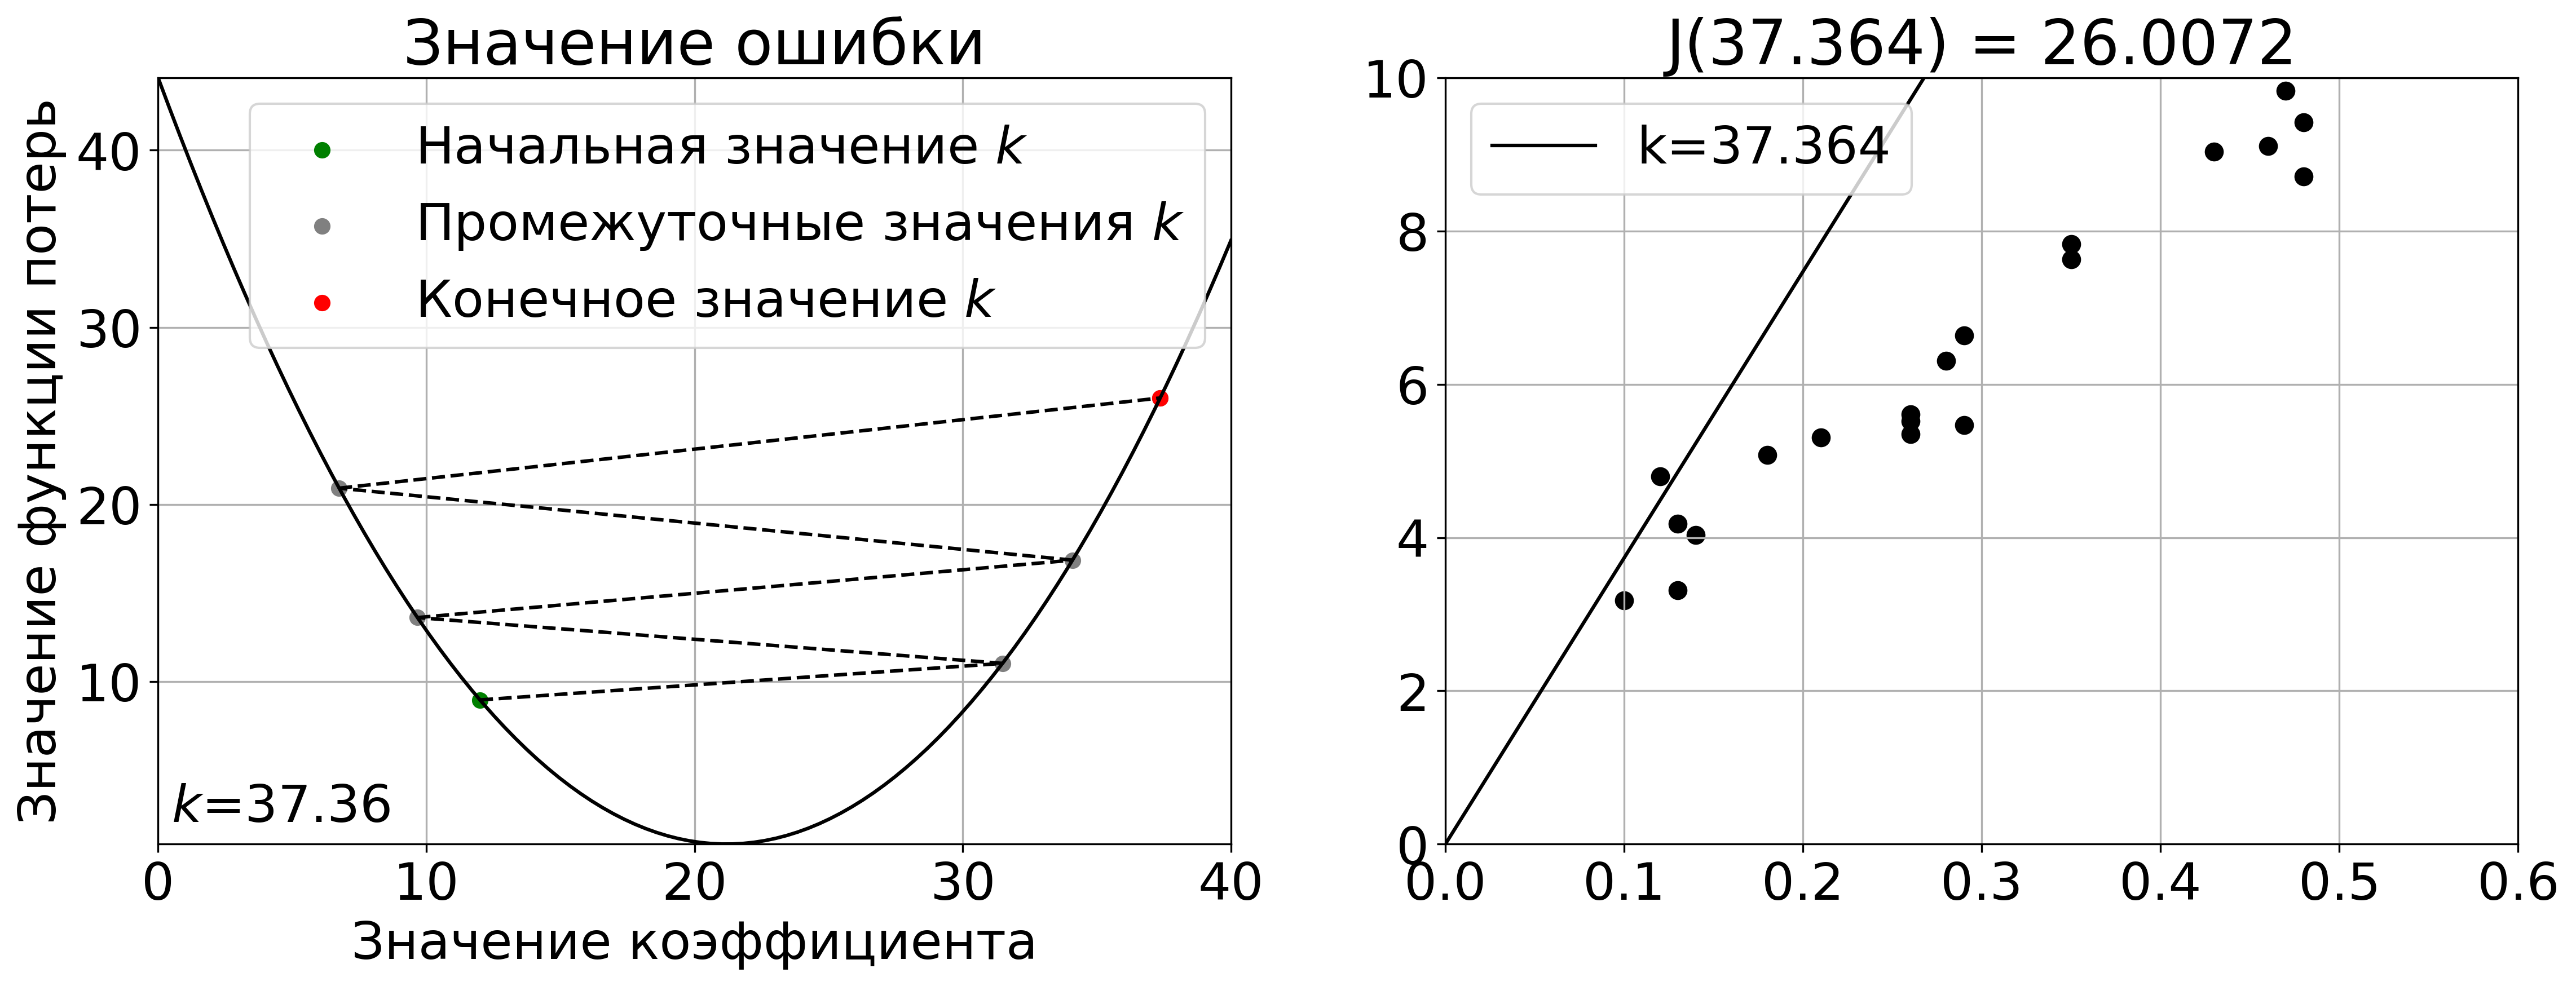

In [24]:
gradient_descent_visualization(X, y, k_init=12.0, a=11.0, it=5)

Градиентный спуск расходится.

- Коэффициент скорости обучения: $11.0$
- Итераций: $5$

## Использование sklearn

In [25]:
# загружаем линейную регрессию из библиотеки sklearn
# в ней реализован класс LinearRegression
from sklearn.linear_model import LinearRegression

# создаем объект линейной регрессии. не обращайте внимание на атрибут fit_intercept
lr = LinearRegression(fit_intercept=False)

# обучаем нашу модель. То есть, запускаем алгоритм, который находит оптимальные параметры. 
# нужно будет немного поменять shape входных данных
lr.fit(X.reshape(-1, 1), y.reshape(-1, 1))

# И получаем значение коэффициента
k_sklearn = lr.coef_[0, 0]

In [26]:
print(f"Абсолютная разница между коэффициентами посчитанным нами и посчитанным sklean'ом:\n{abs(k_gd - k_sklearn)}")

Абсолютная разница между коэффициентами посчитанным нами и посчитанным sklean'ом:
1.0214751711146164e-08
